### K-means clustering with scikit-learn

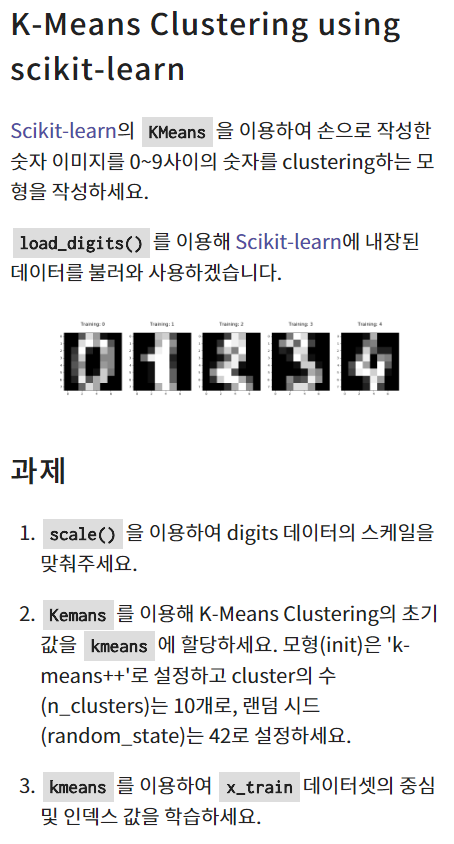

In [1]:
#setting
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.manifold import Isomap

In [2]:
#elice setting
from elice_utils import EliceUtils
eu = EliceUtils()

ModuleNotFoundError: No module named 'elice_utils'

In [3]:
#hyper paremeters
np.random.seed(42)

In [4]:
#data preprocessing
#01. scale digits dataset
digits = load_digits()
data = scale(digits.data)
'''
스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.
스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 
최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.
'''

n_samples, n_feature = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [5]:
#dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state=42)

In [6]:
n_digits

10

In [7]:
# Q2. Create the KMeans model
kmeans = KMeans(n_clusters=n_digits, init='k-means++',random_state=42).fit(x_train)

In [14]:
# Q3. Compute cluster centers and predict cluster index for each samples 
clusters = kmeans.fit_predict(x_train)
print('Clusters: ', clusters)

Clusters:  [1 3 2 ... 6 6 0]


In [15]:

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(x_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

plt.savefig("digits.png") 
#eu.send_image("digits.png")
